## Tarea SVM

### Daniel Espinosa 136981

Objetivos:

+ Entrenar una SVM utilizando sklearn y un kernel lineal

+ Graficar los puntos, la región de decisión y los márgenes del modelo resultante (con valores de C 1 y 100)

+ Comparar el desempeño de una SVM con una red neuronal en la clasificación de puntos adentro y afuera de un círculo

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf

In [191]:
df = pd.read_csv("./andSVM_2.csv",header=0)

df

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


In [192]:
ds = df.as_matrix()

In [193]:
X = ds[:,0:2]
Y = ds[:,2]

### SVM con kernel lineal y C = 1

In [194]:
linear_svc = SVC(kernel="linear", C = 1)
linear_svc.fit(X,Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Graficar las regiones de decisión de las SVM

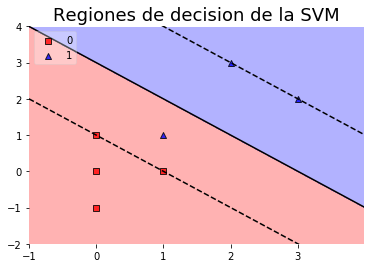

In [195]:
#Region de decison
plot_decision_regions(X=X, y=Y,clf=linear_svc, legend=2)

#calcular el hiperplano que separa
w = linear_svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 4)
yy = a * xx - (linear_svc.intercept_[0]) / w[1]

#calcular los margenes paralelos
margin = 1 / np.sqrt(np.sum(linear_svc.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.ylim([-2,4])
plt.title("Regiones de decision de la SVM", size = 18)
plt.show()

En esta gráfica se puede apreciar las regiones que el clasificador va a considerar como 0 o como 1 así como el plano que separa las regiones y los márgenes paralelos.

Se puede ver que hay una observación que se clasificó incorrectamente, lo cual es probablemente porque C = 1 y este valor corresponde a una penalización baja al error del clasificador, es decir genera una SVM menos estricta.

### SVM con kernel lineal y C = 100

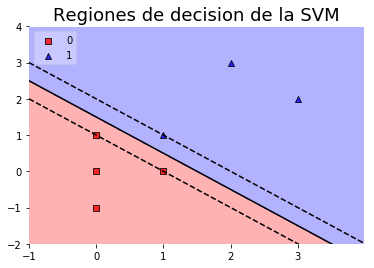

In [196]:
linear_svc = SVC(kernel="linear", C = 100)
linear_svc.fit(X,Y)

#Region de decison
plot_decision_regions(X=X, y=Y,clf=linear_svc, legend=2)

#calcular el hiperplano que separa
w = linear_svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 4)
yy = a * xx - (linear_svc.intercept_[0]) / w[1]

#calcular los margenes paralelos
margin = 1 / np.sqrt(np.sum(linear_svc.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.ylim([-2,4])
plt.title("Regiones de decision de la SVM", size = 18)
plt.show()

Con C = 100, la SVM genera reglas de clasificación más estrictas, las rectas paralelas ahora toman en cuenta al dato etiquetado con 1 más cercano a los datos 0 y por lo tanto la frontera queda mucho más abajo. 

La clasificación con este dataset es ahora "perfecta". Es importante mencionar que la tolerancia puede hacer que un clasificador sea mejor en general, pues puede ignorar outliers que casi no ocurran y poner la frontera de decisión en una ubicación en donde va a tener mucho mejor desempeño clasificando. 

Un ejemplo de lo anteriormente mencionado sería que uno o varios datos nuevos de 0 podrían aparecer cerca del valor en la frontera de 1, si este último dato es un outlier, ocasionará que estos nuevos datos sean clasificados incorrectamente y todo a causa de forzar que el modelo sea demasiado estricto. Esto depende de los datos con los que se trate en cada instancia.

### Comparar el desempeño de una red neuronal y una SVM clasificando puntos dentro de un círculo.

En esta sección se generará un dataset de puntos que están adentro y afuera de un círculo en particular y se les etiquetará dependiendo de esta propiedad. 

Generar el dataset:

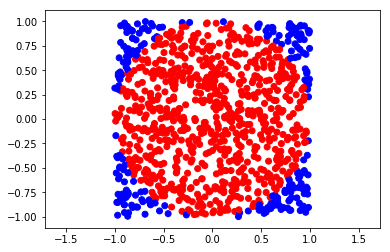

In [197]:
num_points = 1000

x1s = np.random.uniform(-1,1,num_points)
x2s = np.random.uniform(-1,1,num_points)

ys = []

for i in range(num_points):
    if((x1s[i]**2)+(x2s[i]**2) <= 1):
        ys.append(1) # inside
    else:
        ys.append(0) # outside
        
Y_train_mat = np.matrix(ys).T # Make sure it's vertical
Y_train = np.array(ys) #horizontal one

X_train = np.column_stack((x1s,x2s))

plt.scatter(X_train[:,0],X_train[:,1],c=['red' if i==1 else 'blue' for i in Y_train])
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.axis('equal')
plt.show()

Se construye el **modelo de SVM** con un kernel no lineal.

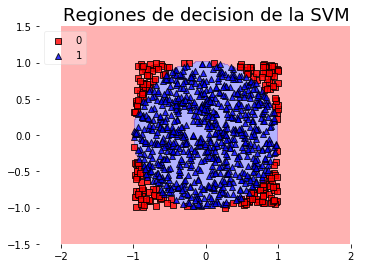

In [198]:
svc = SVC(kernel="rbf", C = 100)
svc.fit(X_train,Y_train)

#Region de decison
plot_decision_regions(X=X_train, y=Y_train,clf=svc, legend=2)


plt.axis('equal')
plt.axis([-1.5, 1.5, -1.5, 1.5])


plt.title("Regiones de decision de la SVM", size = 18)
plt.show()

De manera gráfica se puede ver que la SVM con kernel RBF (Radial Basis Function) tiene una región de decisión muy acertada para poder clasificar los puntos.

Se construye el **modelo de red neuronal**

In [199]:
x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

#dimensiones de los datos de entrada y salida, para las dimensiones de las capas correspondientes
input_size=2
hidden_layer_size=16
output_layer_size=1

#Placeholders para los datos de entrada, incluida la y real, ya que es una entrada en el entrenamiento.
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real


#La variables para lo que se va a ir calculando y modificando en el camino
#primera capa
W_layer1 = tf.Variable(tf.random_uniform([input_size,hidden_layer_size], -1, 1), name="W_layer1") #weights
b_layer1 = tf.Variable(tf.zeros([hidden_layer_size]), name="b_layer1") #bias

#Para la segunda capa
W_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size,output_layer_size], -1, 1), name="W_layer2") #weights
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2") #bias

#Definir las funciones por capas, para que el grafo sepa aplicar backpropagation correctamente
inter = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
y = tf.nn.sigmoid(tf.matmul(inter,W_layer2) + b_layer2)


lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #error cuadratico (se puede hacer con cross entropy)

#Se define como optimizar la loss function y el learning rate
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(10000):
  sess.run(train_step, feed_dict={x: X_train, y_: Y_train_mat}) #Corre sobre todo el input

correct_prediction = tf.equal(tf.round(y),y_) # Tensor de booleanos que indican si la entrada en la prediccion (redondeada) fue correcta.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Casteo a float de los booleanos, sacar promedio de las entradas
print(sess.run(accuracy, feed_dict={x: X_train, y_: Y_train_mat})) # las corremos

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.996


In [200]:
## NN predicted values.
nn_predicted_train = sess.run(tf.round(y), feed_dict={x: X_train, y_: Y_train_mat})

In [202]:
xs = np.linspace(-1.5, 1.5)
ys = np.linspace(-1.5, 1.5)
pred_classes = []
for ex in xs:
    for i in ys:
        pred_class = sess.run(tf.round(y), feed_dict={x: np.column_stack((np.matrix(ex).T,np.matrix(i).T))})
        pred_classes.append((ex, i, pred_class))
        
xs_p, ys_p = [], []
xs_n, ys_n = [], []
for ex, i, c in pred_classes:
    if c == 0:
        xs_n.append(ex)
        ys_n.append(i)
    else:
        xs_p.append(ex)
        ys_p.append(i)

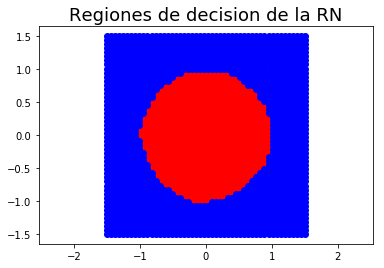

In [208]:
plt.plot(xs_p, ys_p, 'ro', xs_n, ys_n, 'bo')
plt.axis('equal')
plt.title("Regiones de decision de la RN", size = 18)
plt.show()

Como se puede visualizar, la red neuronal tiene una región de decisión bastante acertada aunque se puede notar que no es perfecta por el número limitado de decisiones lineales que debe hacer.

**Comparación**

Se debe mencionar que en esta sección se toma el *accuracy* y la matriz de confusión de los clasificadores respecto a la misma información con la que se les entrenó. Esto no es buena práctica de aprendizaje de máquina ya que no se debe hacer una predicción sobre información ya vista.

Como el objetivo del trabajo es comparar cómo difieren los diferentes modelos en cuanto a su clasificación y regiones de decisión, el autor se toma la libertad de comparar el desempeño de ambos con respecto al dataset de entrenamiento porque en esta situación se podrá comparar mejor cómo y en qué forma ha aprendido cada modelo.

In [204]:
cm_svm = confusion_matrix(Y_train,svc.predict(X_train))
accuracy_svm = float(cm_svm[0,0] + cm_svm[1,1])/float(cm_svm[0,0] + cm_svm[1,1] + cm_svm[0,1] + cm_svm[1,0])

accuracy_nn = sess.run(accuracy, feed_dict={x: X_train, y_: Y_train_mat})
cm_nn = confusion_matrix(Y_train,nn_predicted_train)

In [205]:
print(cm_svm)
print(accuracy_svm)

[[228   4]
 [  2 766]]
0.994


In [206]:
print(cm_nn)
print(accuracy_nn)

[[230   2]
 [  2 766]]
0.996


### Conclusiones

En esta ejecución en particular la red neuronal tuvo un mejor desempeño aunque los dos modelos obtuvieron resultados casi idénticos (el autor sí vió una ejecución en la cual los dos modelos obtuvieron la misma matriz de confusión). La SVM tuvo 2 falsos negativos más.

Ambos modelos fueron relativamente estrictos, la SVM tiene C a 100 y la red neuronal tiene topología 2-16-1 y 10,000 iteraciones.

Ambos modelos sirven bien para clasificar información que no es linealmente separable, cosa que otros modelos no pueden hacer o no pueden hacer con tanta exactitud. Un ejemplo es KNN, sí podría obtener un buen desempeño pero nunca acercarse tanto como estos modelos pues las orillas del círculo siempre quedarían *fuzzy* dependiendo de la cercanía de los datos vecinos en las orillas.

Las máquinas de soporte vectorial son modelos muy potentes de aprendizaje de máquina, además son muy versátiles porque se pueden generar con un kernel diferente y por lo tanto muchos problemas tendrán un kernel adecuado con el cual la SVM puede tener un buen desempeño.

In [207]:
#Cerramos sesion de TF
sess.close()